In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_path = '/content/cropped_image.jpg'
image=cv2.imread(img_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


<function matplotlib.pyplot.show(close=None, block=None)>

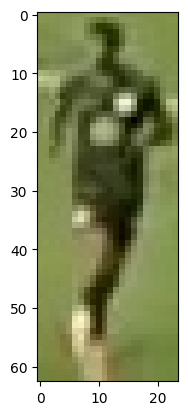

In [6]:
plt.imshow(image)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

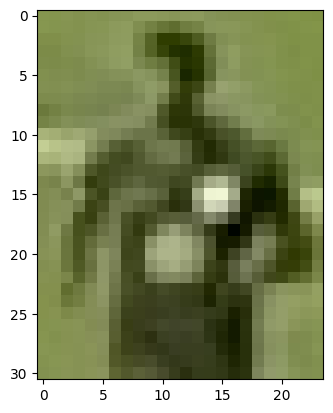

In [8]:
#taking the top half of image
top_half_image=image[0: int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show


In [9]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


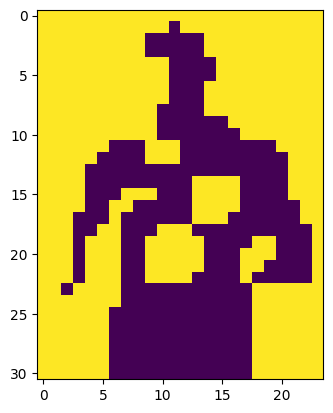

In [11]:
#to separate shirt color from ground color use clustering
#reshape image to 2d array
image_2d=top_half_image.reshape(-1,3)
#perform kmeans clustering with 2d clusters
kmeans=KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels=kmeans.labels_

#reshape the labels into the original image shape
clustered_image=labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()


In [12]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,-1],clustered_image[-1,0]]
non_player_cluster=max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [13]:
player_cluster=1-non_player_cluster
print(player_cluster)

0


In [14]:
kmeans.cluster_centers_[player_cluster]

array([61.01408451, 68.77464789, 28.34507042])